<a href="https://colab.research.google.com/github/Lufec/Car_Plate_Digits_YOLOv5/blob/main/1_ModificaImg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import copy
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Exemplo de tratamento das imagens

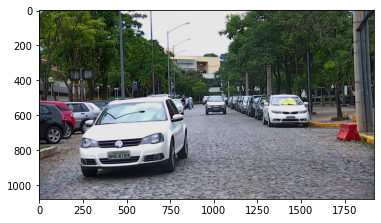

In [ ]:
image = cv2.imread("/content/testing/images/Track7[15].png")
image = image[:,:,::-1]
plt.imshow(image)

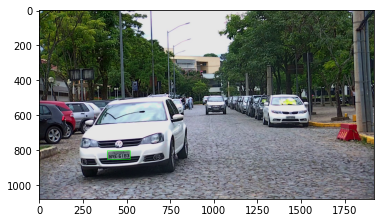

In [ ]:
image = copy.deepcopy(image)
cv2.rectangle(image, (392,804),(392+131,804+49), (0,255,0), 2)
plt.imshow(image)

In [ ]:
image.shape
x = image.shape[1]
y = image.shape[0]

In [ ]:
py = 804
px = 392
pw = 131
ph = 49

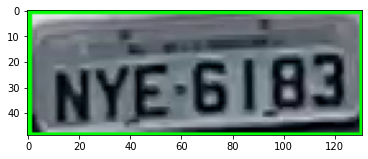

In [ ]:
imcrop = image[py:py+ph, px:px+pw]
plt.imshow(imcrop)

In [ ]:
imcrop.shape

(49, 131, 3)

(59, 160, 3)


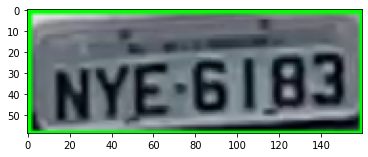

In [ ]:
scale_percent = 160/imcrop.shape[1]
width = int(imcrop.shape[1] * scale_percent)
height = int(imcrop.shape[0] * scale_percent)
dim = (width, height)
imfinal = cv2.resize(imcrop, dim)
print(imfinal.shape)
plt.imshow(imfinal)

In [ ]:
bx = 401-392
by = 826-804
bh = 23
bw = 17

In [ ]:
print(bx,by,bh,bw)

9 22 23 17


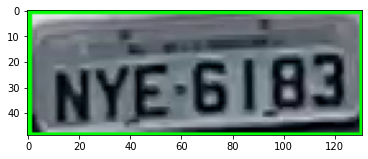

In [ ]:
plt.imshow(imcrop)

In [ ]:
imcrop.shape

(49, 131, 3)

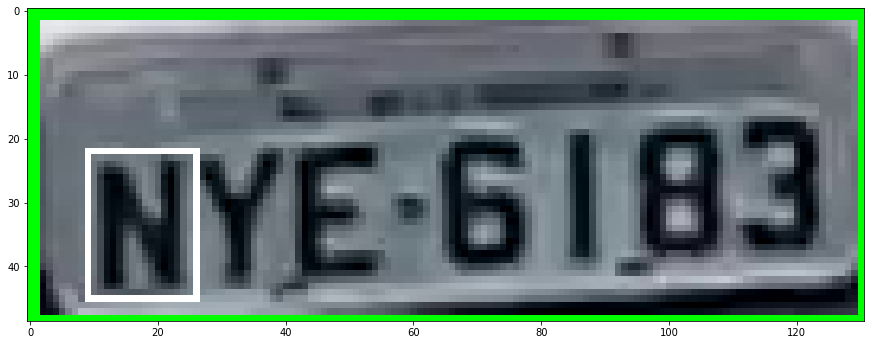

In [ ]:
imcrop = copy.deepcopy(imcrop)
cv2.rectangle(imcrop, (bx,by), (bx+bw,by+bh), (255,255,255), 1)
plt.figure(figsize=(15,10))
plt.imshow(imcrop)
plt.show()

In [ ]:
with open('/content/testing/labels/Track7[15].txt') as t:
  lines = t.readlines()

In [ ]:
lines

['text: NYE-6183\n',
 'position_plate: 392 804 131 49\n',
 'position_chars:\n',
 '\tchar0: 401 826 17 23\n',
 '\tchar1: 418 824 14 23\n',
 '\tchar2: 432 823 17 24\n',
 '\tchar3: 456 822 16 23\n',
 '\tchar4: 475 821 8 24\n',
 '\tchar5: 486 820 16 24\n',
 '\tchar6: 503 819 14 24\n']

In [ ]:
lines[0][6]

'N'

In [ ]:
classe = []

for i in range(7):
    if i<3:
      classe.append(lines[0][i+6])
    else:
      classe.append(lines[0][i+7])
print(classe)

['N', 'Y', 'E', '6', '1', '8', '3']


In [ ]:
bboxPlaca = []

for i in range(4):
  bboxPlaca.append(lines[1].split()[i+1])

bboxPlaca

['392', '804', '131', '49']

In [ ]:
obj = []
for i in range(7):
  param = {}
  param["name"] = classe[i]
  splited = lines[i+3].split()
  param["x"] = splited[1]
  param["y"] = splited[2]
  param["h"] = splited[3]
  param["w"] = splited[4]  
  obj.append(param)
obj

[{'h': '17', 'name': 'N', 'w': '23', 'x': '401', 'y': '826'},
 {'h': '14', 'name': 'Y', 'w': '23', 'x': '418', 'y': '824'},
 {'h': '17', 'name': 'E', 'w': '24', 'x': '432', 'y': '823'},
 {'h': '16', 'name': '6', 'w': '23', 'x': '456', 'y': '822'},
 {'h': '8', 'name': '1', 'w': '24', 'x': '475', 'y': '821'},
 {'h': '16', 'name': '8', 'w': '24', 'x': '486', 'y': '820'},
 {'h': '14', 'name': '3', 'w': '24', 'x': '503', 'y': '819'}]

# Implementação para todas as imagens


In [ ]:
import copy
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp '/content/gdrive/My Drive/Placas/dataset.zip' /content/dataset.zip
!unzip  dataset.zip > /dev/null
!rm dataset.zip

## Imagens de teste

In [ ]:
import os
os.chdir('/content/testing')

In [ ]:
import glob
images = glob.glob('/content/testing/images' + '/*.png')
labels = glob.glob('/content/testing/labels' + '/*.txt')

In [ ]:
images = sorted(images)
labels = sorted(labels)

In [ ]:
imgPlacas = []

for i in range(len(images)):
  with open(labels[i]) as t:
    lines = t.readlines()
    
  classe = []
  for j in range(7):
      if j<3:
          classe.append(lines[0][j+6])
      else:
          classe.append(lines[0][j+7])
  
  temp = []
  for j in range(4):
      temp.append(lines[1].split()[j+1])
  
  bboxPlaca = {}
  bboxPlaca['x'] = temp[0]
  bboxPlaca['y'] = temp[1]
  bboxPlaca['w'] = temp[2]
  bboxPlaca['h'] = temp[3]   

  letters = []
  letters.append(images[i])
  letters.append(bboxPlaca)
  for j in range(7):
    param = {}
    param["class"] = classe[j]
    splited = lines[j+3].split()
    param["x"] = int(splited[1])
    param["y"] = int(splited[2])
    param["w"] = int(splited[3])
    param["h"] = int(splited[4]) 
    letters.append(param)
  imgPlacas.append(letters)


In [ ]:
imgPlacas[0]

['/content/testing/images/Track10[01].png',
 {'h': '29', 'w': '99', 'x': '464', 'y': '696'},
 {'class': 'G', 'h': 16, 'w': 12, 'x': 469, 'y': 707},
 {'class': 'Z', 'h': 17, 'w': 12, 'x': 481, 'y': 706},
 {'class': 'P', 'h': 16, 'w': 11, 'x': 493, 'y': 706},
 {'class': '1', 'h': 18, 'w': 7, 'x': 510, 'y': 705},
 {'class': '7', 'h': 16, 'w': 11, 'x': 520, 'y': 706},
 {'class': '0', 'h': 17, 'w': 12, 'x': 531, 'y': 706},
 {'class': '1', 'h': 16, 'w': 7, 'x': 544, 'y': 706}]

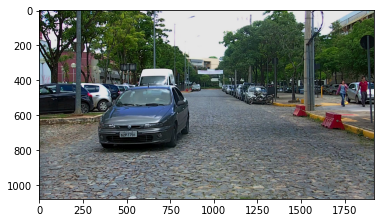

In [ ]:
test = cv2.imread(imgPlacas[0][0])
test = test[:,:,::-1]
plt.imshow(test)

In [ ]:
objPlacas = copy.deepcopy(imgPlacas)
for i in range(len(imgPlacas)):
  objPlacas[i][0] = cv2.imread(imgPlacas[i][0])
  objPlacas[i][0] = objPlacas[i][0][:,:,::-1]
  py = int(objPlacas[i][1]['y'])
  px = int(objPlacas[i][1]['x'])
  pw = int(objPlacas[i][1]['w'])
  ph = int(objPlacas[i][1]['h'])
  img = objPlacas[i][0]
  image = img[py:py+ph, px:px+pw]
  scale_percent = 160/image.shape[1]
  width = int(image.shape[1] * scale_percent)
  height = int(image.shape[0] * scale_percent)
  dim = (width, height)
  image = cv2.resize(image,dim)
  objPlacas[i][0] = image
  
  for j in range(7):
    objPlacas[i][j+2]['y'] -= py  
    objPlacas[i][j+2]['x'] -= px  

[{'x': '464', 'y': '696', 'w': '99', 'h': '29'}, {'class': 'G', 'x': 5, 'y': 11, 'w': 12, 'h': 16}, {'class': 'Z', 'x': 17, 'y': 10, 'w': 12, 'h': 17}, {'class': 'P', 'x': 29, 'y': 10, 'w': 11, 'h': 16}, {'class': '1', 'x': 46, 'y': 9, 'w': 7, 'h': 18}, {'class': '7', 'x': 56, 'y': 10, 'w': 11, 'h': 16}, {'class': '0', 'x': 67, 'y': 10, 'w': 12, 'h': 17}, {'class': '1', 'x': 80, 'y': 10, 'w': 7, 'h': 16}]


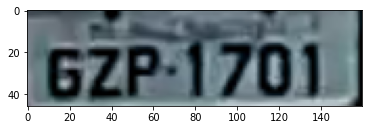

In [ ]:
plt.imshow(objPlacas[0][0])
print(objPlacas[0][1:])

In [ ]:
print(objPlacas[0][2])
print(objPlacas[0][3])
print(objPlacas[0][4])
print(objPlacas[0][5])
print(objPlacas[0][6])
print(objPlacas[0][7])
print(objPlacas[0][8])

{'class': 'G', 'x': 5, 'y': 11, 'w': 12, 'h': 16}
{'class': 'Z', 'x': 17, 'y': 10, 'w': 12, 'h': 17}
{'class': 'P', 'x': 29, 'y': 10, 'w': 11, 'h': 16}
{'class': '1', 'x': 46, 'y': 9, 'w': 7, 'h': 18}
{'class': '7', 'x': 56, 'y': 10, 'w': 11, 'h': 16}
{'class': '0', 'x': 67, 'y': 10, 'w': 12, 'h': 17}
{'class': '1', 'x': 80, 'y': 10, 'w': 7, 'h': 16}


In [ ]:
!mkdir imagesCrop
!mkdir labelsCrop

In [ ]:
os.chdir('/content/testing/imagesCrop')

In [ ]:
for i in range(len(objPlacas)):
  my_string=imgPlacas[i][0]
  filename = my_string.split("/content/testing/images/",1)[1]
  cv2.imwrite(filename, objPlacas[i][0])

In [ ]:
os.chdir('/content/testing/labelsCrop')

In [ ]:
classes = {
    'A':'0','B':'1','C':'2','D':'3','E':'4','F':'5','G':'6','H':'7','I':'8',
    'J':'9','K':'10','L':'11','M':'12','N':'13','O':'14','P':'15','Q':'16',
    'R':'17','S':'18','T':'19','U':'20','V':'21','W':'22','X':'23','Y':'24',
    'Z':'25','0':'26','1':'27','2':'28','3':'29','4':'30','5':'31','6':'32',
    '7':'33','8':'34','9':'35'
}

In [ ]:
objPlacas[0][1]

{'h': '29', 'w': '99', 'x': '464', 'y': '696'}

In [ ]:
for i in range(len(objPlacas)):
  imgW = int(objPlacas[i][1]['w'])
  imgH = int(objPlacas[i][1]['h'])
  lines = []
  for j in range(7):
    label = objPlacas[i][2+j]['class']
    id = classes[label]
    x1 = (objPlacas[i][2+j]['x']+objPlacas[i][2+j]['w']/2)/imgW
    y1 = (objPlacas[i][2+j]['y']+objPlacas[i][2+j]['h']/2)/imgH
    x2 = objPlacas[i][2+j]['w']/imgW
    y2 = objPlacas[i][2+j]['h']/imgH
    if(x1>1 or x2>1 or y1>1 or y2>1):
      print(imgPlacas[i][0],x1,x2,y1,y2)
      print(imgW,imgH)
      print(objPlacas[i][2+j])
    line = id+" "+ str(x1)+" "+str(y1)+" "+str(x2)+" "+str(y2)+"\n"
    if i == 0:
      print(line)
    lines.append(line)
  my_string=imgPlacas[i][0]
  filename = my_string.split("/content/testing/images/",1)[1]
  filename = filename.split(".png",1)[0]
  filename = filename+'.txt'
  annot = open(filename,'w+')
  annot.writelines(lines)
  annot.close()

6 0.1111111111111111 0.6551724137931034 0.12121212121212122 0.5517241379310345

25 0.23232323232323232 0.6379310344827587 0.12121212121212122 0.5862068965517241

15 0.3484848484848485 0.6206896551724138 0.1111111111111111 0.5517241379310345

27 0.5 0.6206896551724138 0.0707070707070707 0.6206896551724138

33 0.6212121212121212 0.6206896551724138 0.1111111111111111 0.5517241379310345

26 0.7373737373737373 0.6379310344827587 0.12121212121212122 0.5862068965517241

27 0.8434343434343434 0.6206896551724138 0.0707070707070707 0.5517241379310345



In [ ]:
os.chdir('/content/testing')

In [ ]:
!mkdir testing

In [ ]:
!mv imagesCrop testing
!mv labelsCrop testing

In [ ]:
os.chdir('/content/testing/testing')

In [ ]:
!mv imagesCrop images
!mv labelsCrop labels

In [ ]:
os.chdir('/content/testing')

In [ ]:
import shutil
shutil.make_archive('testing', 'zip', 'testing')

'/content/testing/testing.zip'

## Imagens de treino

In [ ]:
os.chdir('/content/training')

In [ ]:
images = glob.glob('/content/training/images' + '/*.png')
labels = glob.glob('/content/training/labels' + '/*.txt')

In [ ]:
images = sorted(images)
labels = sorted(labels)

In [ ]:
imgPlacas = []

for i in range(len(images)):
  with open(labels[i]) as t:
    lines = t.readlines()
    
  classe = []
  for j in range(7):
      if j<3:
          classe.append(lines[0][j+6])
      else:
          classe.append(lines[0][j+7])
  
  temp = []
  for j in range(4):
      temp.append(lines[1].split()[j+1])
  
  bboxPlaca = {}
  bboxPlaca['x'] = temp[0]
  bboxPlaca['y'] = temp[1]
  bboxPlaca['w'] = temp[2]
  bboxPlaca['h'] = temp[3]   

  letters = []
  letters.append(images[i])
  letters.append(bboxPlaca)
  for j in range(7):
    param = {}
    param["class"] = classe[j]
    splited = lines[j+3].split()
    param["x"] = int(splited[1])
    param["y"] = int(splited[2])
    param["w"] = int(splited[3])
    param["h"] = int(splited[4]) 
    letters.append(param)
  imgPlacas.append(letters)


In [ ]:
objPlacas = copy.deepcopy(imgPlacas)
for i in range(len(imgPlacas)):
  objPlacas[i][0] = cv2.imread(imgPlacas[i][0])
  objPlacas[i][0] = objPlacas[i][0][:,:,::-1]
  py = int(objPlacas[i][1]['y'])
  px = int(objPlacas[i][1]['x'])
  pw = int(objPlacas[i][1]['w'])
  ph = int(objPlacas[i][1]['h'])
  img = objPlacas[i][0]
  image = img[py:py+ph, px:px+pw]
  image = img[py:py+ph, px:px+pw]
  scale_percent = 160/image.shape[1]
  width = int(image.shape[1] * scale_percent)
  height = int(image.shape[0] * scale_percent)
  dim = (width, height)
  image = cv2.resize(image,dim)
  objPlacas[i][0] = image
  
  for j in range(7):
    objPlacas[i][j+2]['y'] -= py  
    objPlacas[i][j+2]['x'] -= px  

In [ ]:
!mkdir imagesCrop
!mkdir labelsCrop

In [ ]:
os.chdir('/content/training/imagesCrop')

In [ ]:
for i in range(len(objPlacas)):
  my_string=imgPlacas[i][0]
  filename = my_string.split("/content/training/images/",1)[1]
  cv2.imwrite(filename, objPlacas[i][0])

In [ ]:
os.chdir('/content/training/labelsCrop')

In [ ]:
classes = {
    'A':'0','B':'1','C':'2','D':'3','E':'4','F':'5','G':'6','H':'7','I':'8',
    'J':'9','K':'10','L':'11','M':'12','N':'13','O':'14','P':'15','Q':'16',
    'R':'17','S':'18','T':'19','U':'20','V':'21','W':'22','X':'23','Y':'24',
    'Z':'25','0':'26','1':'27','2':'28','3':'29','4':'30','5':'31','6':'32',
    '7':'33','8':'34','9':'35'
}

In [ ]:
for i in range(len(objPlacas)):
  imgW = int(objPlacas[i][1]['w'])
  imgH = int(objPlacas[i][1]['h'])
  lines = []
  for j in range(7):
    label = objPlacas[i][2+j]['class']
    id = classes[label]
    x1 = (objPlacas[i][2+j]['x']+objPlacas[i][2+j]['w']/2)/imgW
    y1 = (objPlacas[i][2+j]['y']+objPlacas[i][2+j]['h']/2)/imgH
    x2 = objPlacas[i][2+j]['w']/imgW
    y2 = objPlacas[i][2+j]['h']/imgH
    if(x1>1 or x2>1 or y1>1 or y2>1):
      print(imgPlacas[i][0],x1,x2,y1,y2)
      print(imgW,imgH)
      print(objPlacas[i][2+j])
    line = id+" "+ str(x1)+" "+str(y1)+" "+str(x2)+" "+str(y2)+"\n"
    lines.append(line)
  my_string=imgPlacas[i][0]
  filename = my_string.split("/content/training/images/",1)[1]
  filename = filename.split(".png",1)[0]
  filename = filename+'.txt'
  annot = open(filename,'w+')
  annot.writelines(lines)
  annot.close()

In [ ]:
os.chdir('/content/training')

In [ ]:
!mkdir training

In [ ]:
!mv imagesCrop training
!mv labelsCrop training

In [ ]:
os.chdir('/content/training/training')

In [ ]:
!mv imagesCrop images
!mv labelsCrop labels

In [ ]:
os.chdir('/content/training')

In [ ]:
shutil.make_archive('training', 'zip', 'training')

'/content/training/training.zip'

## Imagens de Validação

In [ ]:
os.chdir('/content/validation')

In [ ]:
images = glob.glob('/content/validation/images' + '/*.png')
labels = glob.glob('/content/validation/labels' + '/*.txt')

In [ ]:
images = sorted(images)
labels = sorted(labels)

In [ ]:
imgPlacas = []

for i in range(len(images)):
  with open(labels[i]) as t:
    lines = t.readlines()
    
  classe = []
  for j in range(7):
      if j<3:
          classe.append(lines[0][j+6])
      else:
          classe.append(lines[0][j+7])
  
  temp = []
  for j in range(4):
      temp.append(lines[1].split()[j+1])
  
  bboxPlaca = {}
  bboxPlaca['x'] = temp[0]
  bboxPlaca['y'] = temp[1]
  bboxPlaca['w'] = temp[2]
  bboxPlaca['h'] = temp[3]   

  letters = []
  letters.append(images[i])
  letters.append(bboxPlaca)
  for j in range(7):
    param = {}
    param["class"] = classe[j]
    splited = lines[j+3].split()
    param["x"] = int(splited[1])
    param["y"] = int(splited[2])
    param["w"] = int(splited[3])
    param["h"] = int(splited[4]) 
    letters.append(param)
  imgPlacas.append(letters)


In [ ]:
objPlacas = copy.deepcopy(imgPlacas)
for i in range(len(imgPlacas)):
  objPlacas[i][0] = cv2.imread(imgPlacas[i][0])
  objPlacas[i][0] = objPlacas[i][0][:,:,::-1]
  py = int(objPlacas[i][1]['y'])
  px = int(objPlacas[i][1]['x'])
  pw = int(objPlacas[i][1]['w'])
  ph = int(objPlacas[i][1]['h'])
  img = objPlacas[i][0]
  image = img[py:py+ph, px:px+pw]
  image = img[py:py+ph, px:px+pw]
  scale_percent = 160/image.shape[1]
  width = int(image.shape[1] * scale_percent)
  height = int(image.shape[0] * scale_percent)
  dim = (width, height)
  image = cv2.resize(image,dim)
  objPlacas[i][0] = image
  
  for j in range(7):
    objPlacas[i][j+2]['y'] -= py  
    objPlacas[i][j+2]['x'] -= px  

In [ ]:
!mkdir imagesCrop
!mkdir labelsCrop

In [ ]:
os.chdir('/content/validation/imagesCrop')

In [ ]:
for i in range(len(objPlacas)):
  my_string=imgPlacas[i][0]
  filename = my_string.split("/content/validation/images/",1)[1]
  cv2.imwrite(filename, objPlacas[i][0])

In [ ]:
os.chdir('/content/validation/labelsCrop')

In [ ]:
classes = {
    'A':'0','B':'1','C':'2','D':'3','E':'4','F':'5','G':'6','H':'7','I':'8',
    'J':'9','K':'10','L':'11','M':'12','N':'13','O':'14','P':'15','Q':'16',
    'R':'17','S':'18','T':'19','U':'20','V':'21','W':'22','X':'23','Y':'24',
    'Z':'25','0':'26','1':'27','2':'28','3':'29','4':'30','5':'31','6':'32',
    '7':'33','8':'34','9':'35'
}

In [ ]:
for i in range(len(objPlacas)):
  imgW = int(objPlacas[i][1]['w'])
  imgH = int(objPlacas[i][1]['h'])
  lines = []
  for j in range(7):
    label = objPlacas[i][2+j]['class']
    id = classes[label]
    x1 = (objPlacas[i][2+j]['x']+objPlacas[i][2+j]['w']/2)/imgW
    y1 = (objPlacas[i][2+j]['y']+objPlacas[i][2+j]['h']/2)/imgH
    x2 = objPlacas[i][2+j]['w']/imgW
    y2 = objPlacas[i][2+j]['h']/imgH
    if(x1>1 or x2>1 or y1>1 or y2>1):
      print(imgPlacas[i][0],x1,x2,y1,y2)
      print(imgW,imgH)
      print(objPlacas[i][2+j])
    line = id+" "+ str(x1)+" "+str(y1)+" "+str(x2)+" "+str(y2)+"\n"
    lines.append(line)
  my_string=imgPlacas[i][0]
  filename = my_string.split("/content/validation/images/",1)[1]
  filename = filename.split(".png",1)[0]
  filename = filename+'.txt'
  annot = open(filename,'w+')
  annot.writelines(lines)
  annot.close()

In [ ]:
os.chdir('/content/validation')

In [ ]:
!mkdir validation

In [ ]:
!mv imagesCrop validation
!mv labelsCrop validation

In [ ]:
os.chdir('/content/validation/validation')

In [ ]:
!mv imagesCrop images
!mv labelsCrop labels

In [ ]:
os.chdir('/content/validation')

In [ ]:
shutil.make_archive('validation', 'zip', 'validation')

'/content/validation/validation.zip'

In [ ]:
os.chdir('/content')

In [ ]:
!mkdir data

In [ ]:
!cp '/content/gdrive/My Drive/Placas/data.yaml' /content/data/data.yaml

## Junção de todas as imagens para salvar

In [ ]:
!mv /content/testing/testing /content/data
!mv /content/training/training /content/data
!mv /content/validation/validation /content/data

In [ ]:
shutil.make_archive('data', 'zip', 'data')

'/content/data.zip'

In [ ]:
!mv data.zip /content/gdrive/MyDrive/Placas